In [4]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [7]:
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy import signal as sig
from noisereduce import reduce_noise

In [9]:
# Créer des instance de Son à partir des fichiers
file1 = "soundfiles/test_leste/1-1.wav"
file2 = "soundfiles/test_leste/2-3.wav"
test1 = Sound(file1, name='leste')
test2 = Sound(file2, name='non leste', fundamental=80)

## Ajout d'une méthode pour conditionner les sons

`Sound.condition()` équivaut à :

```
    Sound.trim_signal()
    Sound.filter_noise()
    Sound.get_fundamental()
    Sound.bin_divide()
```

## Ajout d'une méthode pour trouver la fondamentale d'un son :

In [10]:
# Fondamentale absente
print(test1.fundamental)
print(test2.fundamental)
print('')

# Conditionement minimal
test1.trim_signal()
test1.filter_noise()

# Trouver la fondamentale
test1.get_fundamental()

# Fondamentale trouvée
print(test1.fundamental, 'Hz')


None
80

Signal is too short to be trimmed before onset.

Not sufficient noise in the raw signal, unable to filter.

81.90575878067848 Hz


## 2. Fixer le bug quand le noise n'était pas suffisant 

In [11]:
test1.raw_signal.listen()

In [12]:
# Si on fait :
test1.condition()
# On obtient des messages d'avertissement :

Signal is too short to be trimmed before onset.

Not sufficient noise in the raw signal, unable to filter.



In [14]:
test2.condition(verbose=False)

## Graphique des enveloppes pour toutes les bins de fréquence
Reste à corriger le nombre de samples par maximum pour l'enveloppe

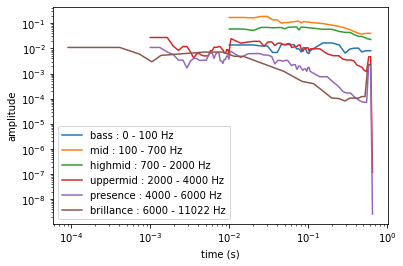

In [15]:
test2.plot_freq_bins()

## Comparaison normalisée pour les deux sons

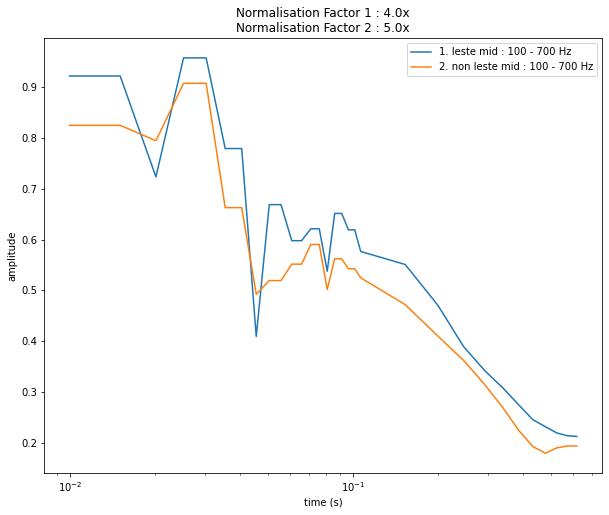

In [17]:
guit.time_compare(test1, test2, fbin='mid')

## Transformées de Fourier Mirroir Normalisées

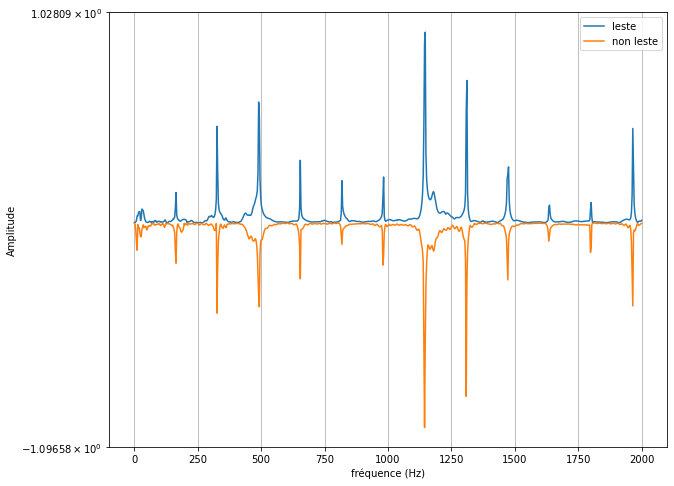

In [19]:
guit.fft_mirror(test1, test2)

## Ajout du type de plot : histogramme par bandes d'octaves

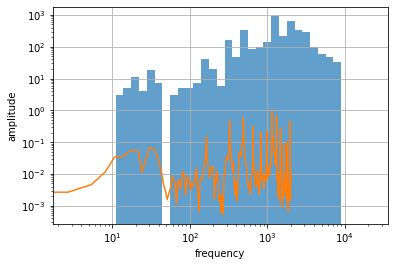

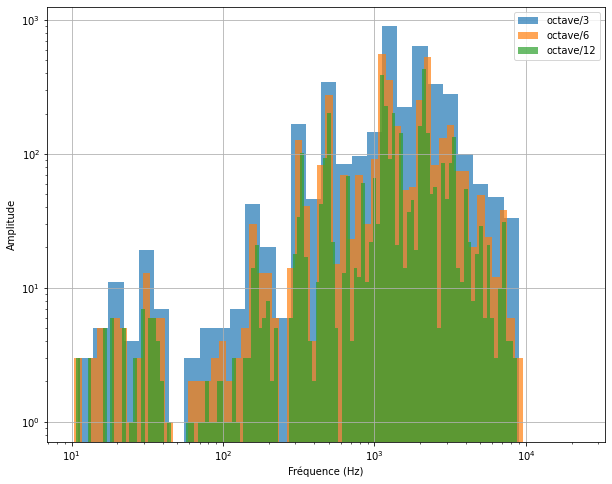

In [22]:
test1.signal.plot(kind='fft hist')
test1.signal.plot(kind='fft')

plt.figure(figsize=(10,8))
test1.signal.plot(kind='fft hist', label='octave/3')
test1.SP.change('octave_fraction', 6)
test1.signal.plot(kind='fft hist', label='octave/6')
test1.SP.change('octave_fraction', 12)
test1.signal.plot(kind='fft hist', label='octave/12')
plt.legend()
plt.show()

## Différence des FT sous forme de bandes d'octave

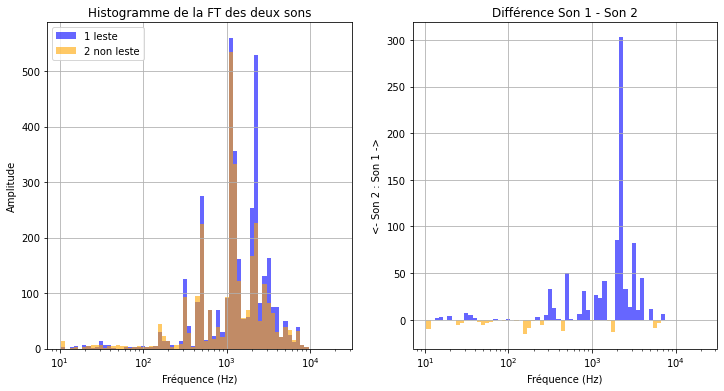

In [24]:
guit.fft_diff(test1,test2, fraction=6)